# Cleaning Data

## 1. Missing data

### a - Filling (Remplir) missing data

Fill in a column’s missing values with a **statistical value** such as the **mean, median, or mode** OR 
**Using a model** to learn values that seem reasonable for missing values :  **K-Nearest Neighbors**

In [1]:
import numpy as np
import pandas as pd
pd_series = pd.Series([5, 10, np.nan, 15, 20, np.nan, 25, 50, np.nan])
print(f"Average of non-missing values: {pd_series.mean()}")
pd_series = pd_series.fillna(pd_series.mean())
print(pd_series)

Average of non-missing values: 20.833333333333332
0     5.000000
1    10.000000
2    20.833333
3    15.000000
4    20.000000
5    20.833333
6    25.000000
7    50.000000
8    20.833333
dtype: float64


### b - Dropping missing data

In [2]:
pd_series = pd.Series([5, 10, np.nan, 15, 20, np.nan, 25, 50, np.nan])
pd_series = pd_series.dropna()
print(pd_series)

0     5.0
1    10.0
3    15.0
4    20.0
6    25.0
7    50.0
dtype: float64


## 2. Outlier

Here is a post that deals with some more advanced ways of detecting outlier : https://www.kdnuggets.com/2017/01/3-methods-deal-outliers.html

In [3]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'educationnum', 'maritalstatus', 'occupation', 'relationship', 'race',
        'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry', 'label']
train_df = pd.read_csv("Data/adult.data", header=None, names=names)

<AxesSubplot:>

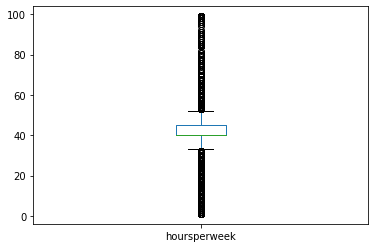

In [4]:
train_df['hoursperweek'].plot(kind="box")

## 3. Scaling

Having income values that range from 100 to 100,000 and ages that range from 0 to 100 can cause issues because of the large difference in scale of these two data columns

### a - Standard scaling (subtracts the mean and divides by the standard deviation)

In [5]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Create a matrix of data
data = [[-1, 2, 5], 
        [-0.5, 6, 11], 
        [0, 10, 12], 
        [1, 18, 4]]

print("Before Standard scaling")
print(np.mean(data, 0))     # 0 for columns & 1 for rows
print(np.std(data, 0))
print()
# Initalize a StandardScaler
standard = StandardScaler()
# Fit and transform the data with the StandardScaler
standard_data = standard.fit_transform(data)

print("After Standard scaling")
print(np.mean(standard_data, 0))
print(np.std(standard_data, 0))

Before Standard scaling
[-0.125  9.     8.   ]
[0.73950997 5.91607978 3.53553391]

After Standard scaling
[0. 0. 0.]
[1. 1. 1.]


### b - Min/Max scaling

**the MinMaxScaler()** scales each column to have a min value of **0** and a max value of **1**.

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Initalize MinMaxScaler
min_max = MinMaxScaler()
# Fit and transform the data
min_max_data = min_max.fit_transform(data)

print(np.min(min_max_data, 0))
print(np.max(min_max_data, 0))
print(np.mean(min_max_data, 0))
print(np.std(min_max_data, 0))

[0. 0. 0.]
[1. 1. 1.]
[0.4375 0.4375 0.5   ]
[0.36975499 0.36975499 0.44194174]


## 4. Categorical Data

### a - Label encoding

Label encoding works by converting the unique values to a numeric representation. For example, if we have two categories male and female, we can categorize them as numbers: **male as 0** and **female 1**

In [7]:
# Create series with male and female values
non_categorical_series = pd.Series(['male', 'female', 'male', 'female'])
# Convert the text series to a categorical series
categorical_series = non_categorical_series.astype('category')
# Print the numeric codes for each value
print(categorical_series.cat.codes)
# Print the category names
print(categorical_series.cat.categories)

0    1
1    0
2    1
3    0
dtype: int8
Index(['female', 'male'], dtype='object')


### b - One-hot encoding (dummy variables)

One-hot encoding is similar but creates a **new column for each category** and fills it with a **1** for each row **with** that value and **zero** otherwise

In [8]:
# Create series with male and female values
non_categorical_series = pd.Series(['male', 'female', 'male', 'female'])
# Create dummy or one-hot encoded variables
print(pd.get_dummies(non_categorical_series))

   female  male
0       0     1
1       1     0
2       0     1
3       1     0
